- Objetivo: Analisar a rede de colaboração científica entre universidades.
- Dados: Criaremos dados fictícios representando coautorias de artigos científicos entre universidades.
- Análise: Calcularemos métricas de colaboração e visualizaremos a rede de colaborações de várias maneiras.

### Etapas:
- Criação de um Grafo Bipartido: Adicionamos dois tipos de nós (universidades e artigos) e conectamos universidades a artigos baseados em uma relação fictícia de coautoria.
- Visualização com Matplotlib: Mostramos o grafo bipartido para entender as conexões diretas entre universidades e artigos.
- Projeção para um Grafo de Colaboração: Projetamos o grafo bipartido para criar um novo grafo apenas entre universidades, onde uma aresta representa uma coautoria compartilhada em pelo menos um artigo.
- Visualização com Pyvis: Utilizamos o Pyvis para uma visualização interativa do grafo de colaboração.
- Cálculo de Métricas e Análise: Calculamos métricas de rede como o grau e a centralidade de intermediação para identificar as universidades mais influentes na rede de colaboração.

In [3]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from pyvis.network import Network
import random

In [4]:
# Definição das universidades e dos artigos científicos
universities = ['Harvard', 'MIT', 'Stanford', 'Oxford', 'Cambridge', 'Caltech', 'Princeton', 'Columbia', 'Chicago', 'Yale']
articles = ['Article ' + str(i) for i in range(1, 16)]

In [5]:
# Criando um grafo bipartido
B = nx.Graph()
B.add_nodes_from(universities, bipartite=0)  # Adicionando um conjunto de nós para universidades
B.add_nodes_from(articles, bipartite=1)  # Adicionando um conjunto de nós para artigos

In [6]:
# Adicionando arestas entre universidades e artigos
for article in articles:
    # Cada artigo é coautorado por um número aleatório de universidades
    coauthors = random.sample(universities, random.randint(2, 5))
    for university in coauthors:
        B.add_edge(university, article)

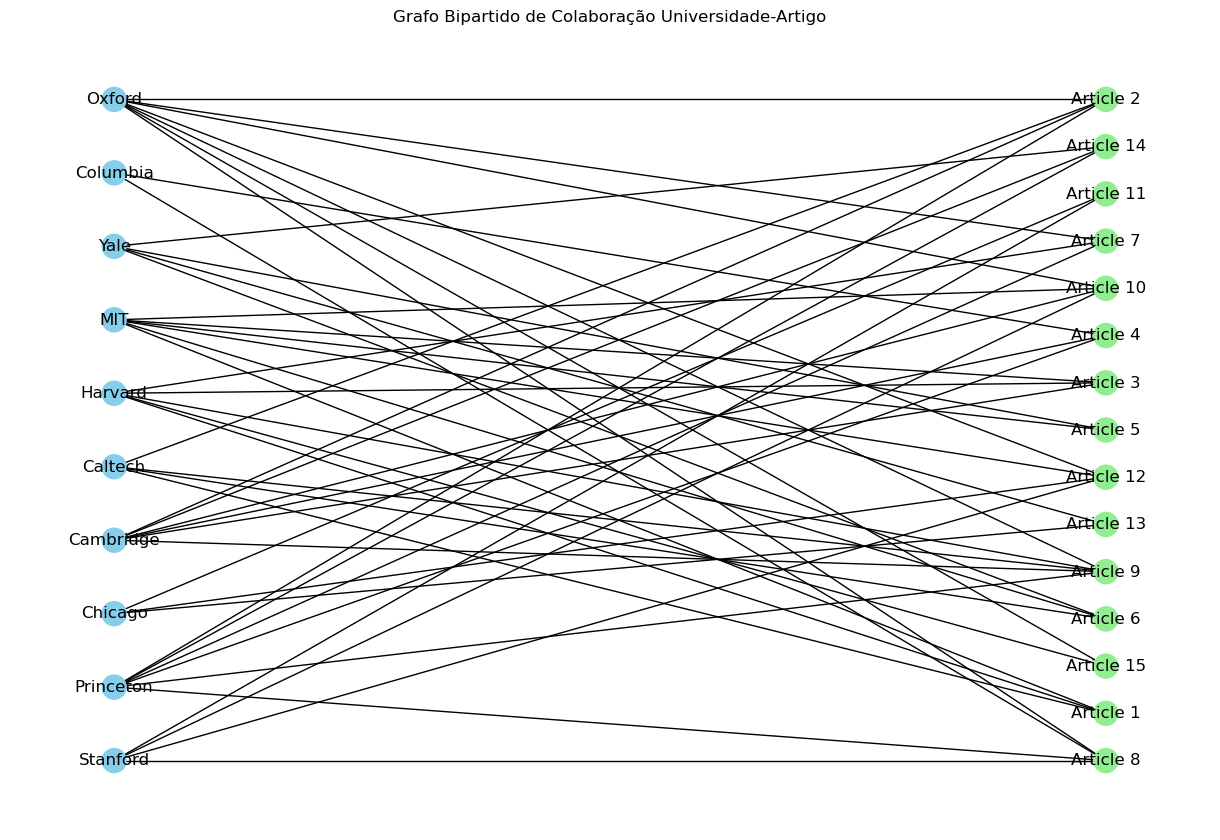

In [7]:
# Visualização do grafo bipartido com Matplotlib
plt.figure(figsize=(12, 8))
pos = nx.drawing.layout.bipartite_layout(B, universities)
nx.draw(B, pos, with_labels=True, node_color=['skyblue' if node in universities else 'lightgreen' for node in B])
plt.title('Grafo Bipartido de Colaboração Universidade-Artigo')
plt.show()

In [8]:
# Projeção para um grafo de colaboração entre universidades
collaboration_graph = bipartite.projected_graph(B, universities)

# Visualização do grafo de colaboração com Pyvis
net = Network(notebook=True)
net.from_nx(collaboration_graph)
net.show('university_collaboration.html')

university_collaboration.html


In [9]:
# Cálculo de métricas
degrees = dict(collaboration_graph.degree())
betweenness = nx.betweenness_centrality(collaboration_graph)
print("Graus de colaboração:", degrees)
print("Centralidade de intermediação:", betweenness)

Graus de colaboração: {'Harvard': 5, 'MIT': 7, 'Stanford': 6, 'Oxford': 8, 'Cambridge': 8, 'Caltech': 6, 'Princeton': 7, 'Columbia': 4, 'Chicago': 4, 'Yale': 5}
Centralidade de intermediação: {'Harvard': 0.004629629629629629, 'MIT': 0.06342592592592591, 'Stanford': 0.04398148148148147, 'Oxford': 0.09953703703703702, 'Cambridge': 0.07962962962962962, 'Caltech': 0.01712962962962963, 'Princeton': 0.06574074074074072, 'Columbia': 0.0, 'Chicago': 0.012499999999999999, 'Yale': 0.030092592592592587}


In [10]:
# Identificação das universidades mais centrais
most_central = max(betweenness, key=betweenness.get)
print(f"A universidade com maior centralidade de intermediação é {most_central}.")

A universidade com maior centralidade de intermediação é Oxford.
